<a href="https://colab.research.google.com/github/mouraffa/Generative-Adversarial-Networks-GANs-for-Anime-Image-Generation/blob/main/Generative_Adversarial_Networks_(GANs)_for_Anime_Image_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative Adversarial Networks (GANs) for Anime Image Generation


## Introduction

Welcome to the world of Generative Adversarial Networks (GANs) applied to the fascinating task of anime image generation! In this project, we delve into the realm of artificial intelligence and computer vision to create lifelike anime images using advanced machine learning techniques.

## Purpose

The primary goal of this project is to harness the power of GANs, a class of neural networks, to generate anime-style images. GANs consist of two competing networks – a generator that creates synthetic images and a discriminator that evaluates the authenticity of these images. Through adversarial training, the generator learns to produce realistic images, making GANs particularly suitable for creative tasks like anime generation.

## Steps Followed

1. **Dataset Download and Exploration:** We begin by obtaining the Anime Face Dataset and exploring its contents. Understanding the dataset structure is crucial for subsequent processing steps.

2. **Data Preprocessing:** The dataset undergoes preprocessing, including resizing, cropping, and normalization, to prepare it for training.

3. **GAN Architecture Definition:** We define the architecture of the discriminator and generator networks, crucial components of the GAN model.

4. **Training the GAN Model:** The GAN model is trained over multiple epochs, with the generator aiming to create convincing anime images, and the discriminator learning to distinguish between real and generated images.

5. **Visualization and Analysis:** We visualize the training progress, inspect generated images, and analyze the losses and scores of the GAN model.

6. **Model Checkpoints and Image Saving:** The trained generator and discriminator models are saved, and the generated images are packaged into a zip file for further exploration.

7. **Video Generation:** A dynamic representation of the training progress is created by generating a video from the synthesized images.

8. **Conclusion:** The project concludes with a summary of achievements, insights gained, and potential areas for future exploration.



## About Generative Adversarial Networks (GANs)

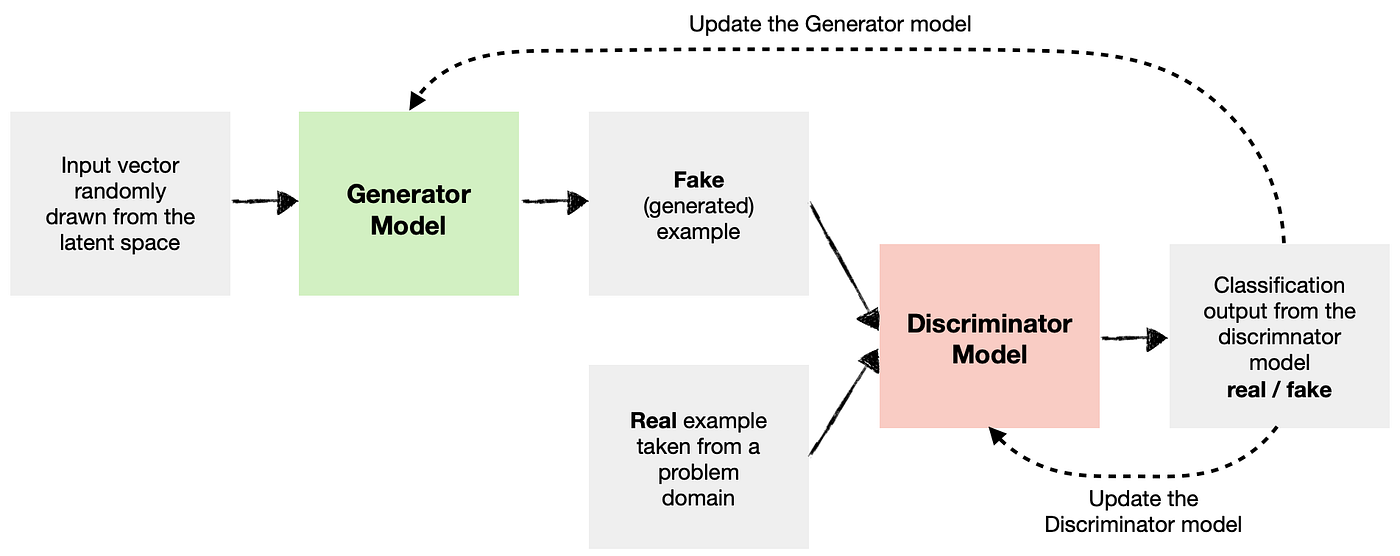

GANs were introduced by Ian Goodfellow and his colleagues in 2014. The concept revolves around two neural networks – a generator and a discriminator – engaged in a continuous adversarial game. The generator strives to produce realistic data, while the discriminator aims to distinguish between genuine and synthetic data. This dynamic interplay results in the generation of high-quality, indistinguishable-from-real data.

> Feel free to explore the code cells to gain a deeper understanding of each step in the process. Enjoy the journey into the fascinating world of anime image generation with GANs!


In [ ]:
# Uncomment and run the appropriate command for your operating system, if required
# No installation is reqiured on Google Colab / Kaggle notebooks

# Linux / Binder / Windows (No GPU)
# !pip install numpy matplotlib torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# Linux / Windows (GPU)
# pip install numpy matplotlib torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

# MacOS (NO GPU)
# !pip install numpy matplotlib torch torchvision torchaudio

# Installing Required Libraries

In this section, we install the necessary libraries using the pip package manager. Specifically, we install the `opendatasets` library, which is used to download datasets from platforms like Kaggle.


In [ ]:
# Install the OpenDatasets library for easy dataset downloading
!pip install opendatasets --upgrade --quiet

# Downloading Dataset

Here, we use the `opendatasets` library to download the Anime Face Dataset from Kaggle. The dataset will be used for training a Generative Adversarial Network (GAN) to generate anime images.


In [ ]:
# Import the OpenDatasets library for dataset downloading
import opendatasets as od

# Specify the URL of the anime face dataset on Kaggle
dataset_url = 'https://www.kaggle.com/splcher/animefacedataset'

# Download the dataset using OpenDatasets library
od.download(dataset_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: youssefmouraffa
Your Kaggle Key: ··········


100%|██████████| 395M/395M [00:04<00:00, 88.7MB/s]


# Exploring Dataset

After downloading the dataset, we explore its contents to gain insights into the structure and format of the data. This step is essential for understanding the data before proceeding with further processing.


In [ ]:
# Import the os module for directory manipulation
import os

# Specify the path to the downloaded anime face dataset
DATA_DIR = './animefacedataset'

# Print the list of files and directories in the dataset directory
print(os.listdir(DATA_DIR))


['images']


In [ ]:
# Print the list of the first 10 files in the 'images' subdirectory of the dataset
print(os.listdir(os.path.join(DATA_DIR, 'images'))[:10])


['10936_2005.jpg', '11549_2005.jpg', '47894_2014.jpg', '11424_2005.jpg', '44921_2014.jpg', '35033_2011.jpg', '10397_2004.jpg', '25176_2009.jpg', '20655_2008.jpg', '10272_2004.jpg']


# Loading and Transforming Data

In this section, we load the dataset and apply necessary transformations to the images. These transformations typically include resizing, cropping, normalization, and converting the images into tensors.


In [ ]:
# Import necessary modules for data loading and transformations
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as T


In [ ]:
# Define image size, batch size, and image statistics for normalization
image_size = 64
batch_size = 128
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)


In [ ]:
# Create the training dataset using ImageFolder and apply transformations
train_ds = ImageFolder(DATA_DIR, transform=T.Compose([
    T.Resize(image_size),
    T.CenterCrop(image_size),
    T.ToTensor(),
    T.Normalize(*stats)]))

# Create a DataLoader for the training dataset
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Visualizing Images

Here, we define functions to denormalize and visualize images. Additionally, we showcase a batch of images from the dataset to visually inspect the preprocessing results.


In [ ]:
# Import necessary modules for visualization
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
def denorm(img_tensors):
    """
    Denormalize the input image tensors.

    Parameters:
        - img_tensors (torch.Tensor): Normalized image tensors.

    Returns:
        - torch.Tensor: Denormalized image tensors.
    """
    return img_tensors * stats[1][0] + stats[0][0]


In [ ]:
def show_images(images, nmax=64):
    """
    Display a grid of denormalized images.

    Parameters:
        - images (torch.Tensor): Tensor of images to be displayed.
        - nmax (int): Maximum number of images to display (default: 64).
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(denorm(images.detach()[:nmax]), nrow=8).permute(1, 2, 0))

def show_batch(dl, nmax=64):
    """
    Display a batch of images from the given DataLoader.

    Parameters:
        - dl (torch.utils.data.DataLoader): DataLoader containing the images.
        - nmax (int): Maximum number of images to display (default: 64).
    """
    for images, _ in dl:
        show_images(images, nmax)
        break


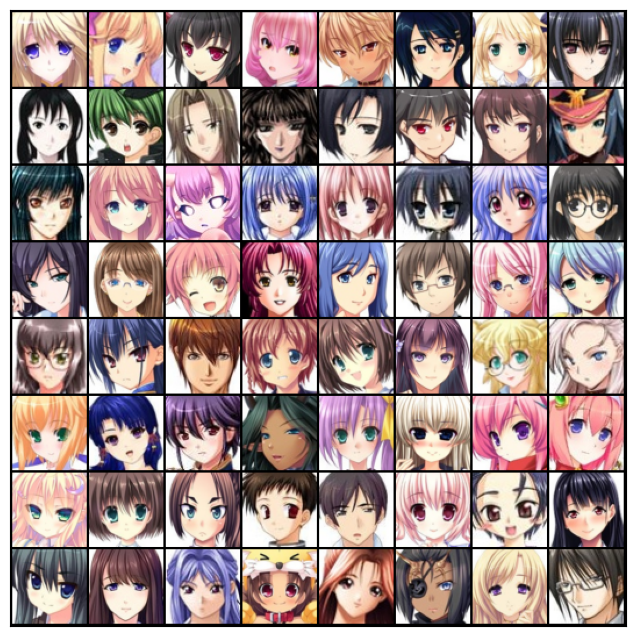

In [ ]:
# Display a batch of images from the training DataLoader
show_batch(train_dl)


# Device Configuration and Helper Functions

This section involves setting up the device for training (CPU or GPU) and defining helper functions, such as those for moving data to the chosen device.


In [ ]:
def get_default_device():
    """
    Pick GPU if available, else CPU.

    Returns:
        - torch.device: Chosen device.
    """
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """
    Move tensor(s) to the chosen device.

    Parameters:
        - data: Input tensor or list/tuple of tensors.
        - device (torch.device): Target device.

    Returns:
        - Tensor or list/tuple of tensors on the specified device.
    """
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """
    Wrap a DataLoader to move data to a device.

    Parameters:
        - dl (torch.utils.data.DataLoader): DataLoader to be wrapped.
        - device (torch.device): Target device.
    """
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to the device."""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches."""
        return len(self.dl)


In [ ]:
# Get the default device (GPU if available, else CPU)
device = get_default_device()
device


device(type='cuda')

In [ ]:
# Wrap the training DataLoader with DeviceDataLoader to move data to the specified device
train_dl = DeviceDataLoader(train_dl, device)


# Defining Discriminator Model

The discriminator is a crucial component of the GAN model. In this part, we define the architecture of the discriminator neural network, which aims to distinguish between real and fake images.


In [ ]:
# Import the torch.nn module for neural network components
import torch.nn as nn


In [ ]:
# Define the discriminator model using a sequential architecture
discriminator = nn.Sequential(
    # in: 3 x 64 x 64
    nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1, bias=False),  # Convolutional layer 1
    nn.BatchNorm2d(64),  # Batch normalization 1
    nn.LeakyReLU(0.2, inplace=True),  # Leaky ReLU activation 1
    # out: 64 x 32 x 32

    nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),  # Convolutional layer 2
    nn.BatchNorm2d(128),  # Batch normalization 2
    nn.LeakyReLU(0.2, inplace=True),  # Leaky ReLU activation 2
    # out: 128 x 16 x 16

    nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),  # Convolutional layer 3
    nn.BatchNorm2d(256),  # Batch normalization 3
    nn.LeakyReLU(0.2, inplace=True),  # Leaky ReLU activation 3
    # out: 256 x 8 x 8

    nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),  # Convolutional layer 4
    nn.BatchNorm2d(512),  # Batch normalization 4
    nn.LeakyReLU(0.2, inplace=True),  # Leaky ReLU activation 4
    # out: 512 x 4 x 4

    nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0, bias=False),  # Convolutional layer 5 (output layer)
    # out: 1 x 1 x 1

    nn.Flatten(),  # Flatten the output
    nn.Sigmoid()  # Sigmoid activation to produce a probability score
)


In [ ]:
# Move the discriminator model to the specified device
discriminator = to_device(discriminator, device)


In [ ]:
# Define the size of the latent space for the generator
latent_size = 128


# Defining Generator Model

The generator is responsible for creating synthetic images that resemble the training data. Here, we define the architecture of the generator neural network and initialize the latent variables.


In [ ]:
# Define the generator model using a sequential architecture
generator = nn.Sequential(
    # in: latent_size x 1 x 1
    nn.ConvTranspose2d(latent_size, 512, kernel_size=4, stride=1, padding=0, bias=False),  # Deconvolutional layer 1
    nn.BatchNorm2d(512),  # Batch normalization 1
    nn.ReLU(True),  # ReLU activation 1
    # out: 512 x 4 x 4

    nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),  # Deconvolutional layer 2
    nn.BatchNorm2d(256),  # Batch normalization 2
    nn.ReLU(True),  # ReLU activation 2
    # out: 256 x 8 x 8

    nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),  # Deconvolutional layer 3
    nn.BatchNorm2d(128),  # Batch normalization 3
    nn.ReLU(True),  # ReLU activation 3
    # out: 128 x 16 x 16

    nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),  # Deconvolutional layer 4
    nn.BatchNorm2d(64),  # Batch normalization 4
    nn.ReLU(True),  # ReLU activation 4
    # out: 64 x 32 x 32

    nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1, bias=False),  # Deconvolutional layer 5 (output layer)
    nn.Tanh()  # Tanh activation to produce the final image
    # out: 3 x 64 x 64
)


torch.Size([128, 3, 64, 64])


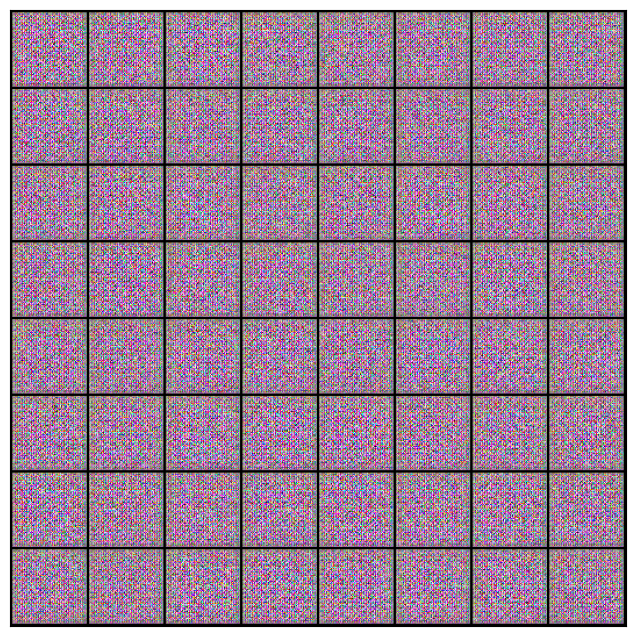

In [ ]:
# Generate random latent tensors and use the generator to create fake images
xb = torch.randn(batch_size, latent_size, 1, 1)  # Random latent tensors
fake_images = generator(xb)
print(fake_images.shape)

# Display the generated fake images
show_images(fake_images)


In [ ]:
# Move the generator model to the specified device
generator = to_device(generator, device)


# Training Functions

This section introduces functions for training both the discriminator and generator. These functions play a key role in the adversarial training process of the GAN model.


In [ ]:
def train_discriminator(real_images, opt_d):
    """
    Train the discriminator using real and fake images.

    Parameters:
        - real_images (torch.Tensor): Batch of real images.
        - opt_d (torch.optim.Optimizer): Discriminator optimizer.

    Returns:
        - Tuple (float, float, float): Discriminator loss, real score, fake score.
    """
    # Clear discriminator gradients
    opt_d.zero_grad()

    # Pass real images through discriminator
    real_preds = discriminator(real_images)
    real_targets = torch.ones(real_images.size(0), 1, device=device)
    real_loss = F.binary_cross_entropy(real_preds, real_targets)
    real_score = torch.mean(real_preds).item()

    # Generate fake images
    latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
    fake_images = generator(latent)

    # Pass fake images through discriminator
    fake_targets = torch.zeros(fake_images.size(0), 1, device=device)
    fake_preds = discriminator(fake_images)
    fake_loss = F.binary_cross_entropy(fake_preds, fake_targets)
    fake_score = torch.mean(fake_preds).item()

    # Update discriminator weights
    loss = real_loss + fake_loss
    loss.backward()
    opt_d.step()


    return loss.item(), real_score, fake_score

In [ ]:
def train_generator(opt_g):
    """
    Train the generator to fool the discriminator.

    Parameters:
        - opt_g (torch.optim.Optimizer): Generator optimizer.

    Returns:
        - float: Generator loss.
    """
    # Clear generator gradients
    opt_g.zero_grad()

    # Generate fake images
    latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
    fake_images = generator(latent)

    # Try to fool the discriminator
    preds = discriminator(fake_images)
    targets = torch.ones(batch_size, 1, device=device)
    loss = F.binary_cross_entropy(preds, targets)

    # Update generator weights
    loss.backward()
    opt_g.step()

    return loss.item()


In [ ]:
# Import the save_image function from torchvision.utils
from torchvision.utils import save_image


In [ ]:
# Specify the directory for saving generated images and create it if it doesn't exist
sample_dir = 'generated'
os.makedirs(sample_dir, exist_ok=True)


In [ ]:
def save_samples(index, latent_tensors, show=True):
    """
    Generate fake images using the generator and save them.

    Parameters:
        - index (int): Index for naming the saved image file.
        - latent_tensors (torch.Tensor): Latent tensors for generating fake images.
        - show (bool): Whether to display the generated images (default: True).
    """
    fake_images = generator(latent_tensors)
    fake_fname = 'generated-images-{0:0=4d}.png'.format(index)
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=8)
    print('Saving', fake_fname)
    if show:
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(fake_images.cpu().detach(), nrow=8).permute(1, 2, 0))


In [ ]:
# Generate fixed latent tensors for consistent sample generation
fixed_latent = torch.randn(64, latent_size, 1, 1, device=device)

Saving generated-images-0000.png


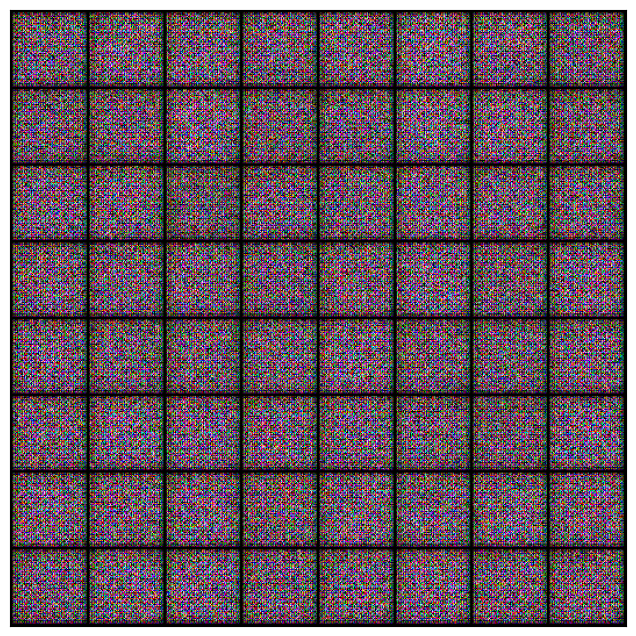

In [ ]:
# Save and display generated samples using the fixed latent tensors
save_samples(0, fixed_latent)


In [ ]:
# Import necessary modules for progress tracking and functional operations
from tqdm.notebook import tqdm
import torch.nn.functional as F

In [ ]:
def fit(epochs, lr, start_idx=1):
    """
    Train the GAN model for a specified number of epochs.

    Parameters:
        - epochs (int): Number of training epochs.
        - lr (float): Learning rate for both discriminator and generator.
        - start_idx (int): Index to start naming the saved images (default: 1).

    Returns:
        - Tuple (list, list, list, list): Generator losses, discriminator losses, real scores, fake scores.
    """
    torch.cuda.empty_cache()

    # Losses & scores
    losses_g = []
    losses_d = []
    real_scores = []
    fake_scores = []

    # Create optimizers
    opt_d = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))
    opt_g = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))

    for epoch in range(epochs):
        for real_images, _ in tqdm(train_dl):
            # Train discriminator
            loss_d, real_score, fake_score = train_discriminator(real_images, opt_d)
            # Train generator
            loss_g = train_generator(opt_g)

        # Record losses & scores
        losses_g.append(loss_g)
        losses_d.append(loss_d)
        real_scores.append(real_score)
        fake_scores.append(fake_score)

        # Log losses & scores (last batch)
        print("Epoch [{}/{}], loss_g: {:.4f}, loss_d: {:.4f}, real_score: {:.4f}, fake_score: {:.4f}".format(
            epoch+1, epochs, loss_g, loss_d, real_score, fake_score))

        # Save generated images
        save_samples(epoch+start_idx, fixed_latent, show=False)

    return losses_g, losses_d, real_scores, fake_scores


# Training the GAN Model

We set hyperparameters such as the learning rate and number of epochs and proceed to train the GAN model. The training process involves iterating over the dataset multiple times to improve the generator's ability to create realistic images.


In [ ]:
# Set learning rate and number of training epochs
lr = 0.0002
epochs = 100

In [ ]:
# Train the GAN model and store the training history
history = fit(epochs, lr)


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [1/100], loss_g: 3.5155, loss_d: 0.4138, real_score: 0.8612, fake_score: 0.2076
Saving generated-images-0001.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [2/100], loss_g: 4.2364, loss_d: 0.3091, real_score: 0.8063, fake_score: 0.0660
Saving generated-images-0002.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [3/100], loss_g: 5.3043, loss_d: 0.3606, real_score: 0.8612, fake_score: 0.1646
Saving generated-images-0003.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [4/100], loss_g: 5.9908, loss_d: 0.8057, real_score: 0.5455, fake_score: 0.0015
Saving generated-images-0004.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [5/100], loss_g: 4.1876, loss_d: 0.1671, real_score: 0.9760, fake_score: 0.1183
Saving generated-images-0005.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [6/100], loss_g: 4.9192, loss_d: 0.1584, real_score: 0.9221, fake_score: 0.0637
Saving generated-images-0006.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [7/100], loss_g: 14.1439, loss_d: 0.9431, real_score: 0.9990, fake_score: 0.5152
Saving generated-images-0007.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [8/100], loss_g: 5.3532, loss_d: 0.1182, real_score: 0.9615, fake_score: 0.0712
Saving generated-images-0008.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [9/100], loss_g: 6.2314, loss_d: 0.1669, real_score: 0.9837, fake_score: 0.1277
Saving generated-images-0009.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [10/100], loss_g: 3.2486, loss_d: 0.2219, real_score: 0.8948, fake_score: 0.0889
Saving generated-images-0010.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [11/100], loss_g: 5.7759, loss_d: 0.1497, real_score: 0.9663, fake_score: 0.0980
Saving generated-images-0011.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [12/100], loss_g: 5.4119, loss_d: 0.2086, real_score: 0.8583, fake_score: 0.0048
Saving generated-images-0012.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [13/100], loss_g: 6.3733, loss_d: 0.2335, real_score: 0.9715, fake_score: 0.1609
Saving generated-images-0013.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [14/100], loss_g: 3.9541, loss_d: 0.1505, real_score: 0.9887, fake_score: 0.1162
Saving generated-images-0014.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [15/100], loss_g: 5.7997, loss_d: 0.1249, real_score: 0.9935, fake_score: 0.1015
Saving generated-images-0015.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [16/100], loss_g: 4.4230, loss_d: 0.0751, real_score: 0.9565, fake_score: 0.0276
Saving generated-images-0016.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [17/100], loss_g: 6.8421, loss_d: 0.3993, real_score: 0.9404, fake_score: 0.1909
Saving generated-images-0017.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [18/100], loss_g: 4.6794, loss_d: 0.0802, real_score: 0.9647, fake_score: 0.0403
Saving generated-images-0018.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [19/100], loss_g: 4.4026, loss_d: 0.0942, real_score: 0.9597, fake_score: 0.0450
Saving generated-images-0019.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [20/100], loss_g: 4.8899, loss_d: 0.1062, real_score: 0.9347, fake_score: 0.0302
Saving generated-images-0020.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [21/100], loss_g: 4.1081, loss_d: 0.1242, real_score: 0.9571, fake_score: 0.0682
Saving generated-images-0021.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [22/100], loss_g: 3.7829, loss_d: 0.1639, real_score: 0.8804, fake_score: 0.0220
Saving generated-images-0022.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [23/100], loss_g: 4.0605, loss_d: 0.1473, real_score: 0.9392, fake_score: 0.0744
Saving generated-images-0023.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [24/100], loss_g: 4.6344, loss_d: 0.1148, real_score: 0.9630, fake_score: 0.0635
Saving generated-images-0024.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [25/100], loss_g: 4.2872, loss_d: 0.2315, real_score: 0.9033, fake_score: 0.1028
Saving generated-images-0025.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [26/100], loss_g: 4.4535, loss_d: 0.0920, real_score: 0.9578, fake_score: 0.0432
Saving generated-images-0026.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [27/100], loss_g: 5.5216, loss_d: 0.1052, real_score: 0.9236, fake_score: 0.0204
Saving generated-images-0027.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [28/100], loss_g: 4.3436, loss_d: 0.1298, real_score: 0.8988, fake_score: 0.0122
Saving generated-images-0028.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [29/100], loss_g: 1.9631, loss_d: 0.1699, real_score: 0.8762, fake_score: 0.0181
Saving generated-images-0029.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [30/100], loss_g: 5.2531, loss_d: 0.1578, real_score: 0.9534, fake_score: 0.0893
Saving generated-images-0030.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [31/100], loss_g: 5.6978, loss_d: 0.1086, real_score: 0.9803, fake_score: 0.0773
Saving generated-images-0031.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [32/100], loss_g: 3.3640, loss_d: 0.0748, real_score: 0.9471, fake_score: 0.0176
Saving generated-images-0032.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [33/100], loss_g: 5.6169, loss_d: 0.0631, real_score: 0.9622, fake_score: 0.0201
Saving generated-images-0033.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [34/100], loss_g: 8.3950, loss_d: 0.4223, real_score: 0.9978, fake_score: 0.2664
Saving generated-images-0034.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [35/100], loss_g: 4.4107, loss_d: 0.1324, real_score: 0.9820, fake_score: 0.0956
Saving generated-images-0035.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [36/100], loss_g: 4.2168, loss_d: 0.0844, real_score: 0.9607, fake_score: 0.0350
Saving generated-images-0036.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [37/100], loss_g: 4.0604, loss_d: 0.0935, real_score: 0.9349, fake_score: 0.0177
Saving generated-images-0037.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [38/100], loss_g: 5.7909, loss_d: 0.0622, real_score: 0.9844, fake_score: 0.0427
Saving generated-images-0038.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [39/100], loss_g: 3.5989, loss_d: 0.1956, real_score: 0.9204, fake_score: 0.0853
Saving generated-images-0039.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [40/100], loss_g: 3.5168, loss_d: 0.1416, real_score: 0.8963, fake_score: 0.0146
Saving generated-images-0040.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [41/100], loss_g: 4.9520, loss_d: 0.1734, real_score: 0.9485, fake_score: 0.0958
Saving generated-images-0041.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [42/100], loss_g: 5.2710, loss_d: 0.0432, real_score: 0.9844, fake_score: 0.0255
Saving generated-images-0042.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [43/100], loss_g: 3.5027, loss_d: 0.2717, real_score: 0.9090, fake_score: 0.1336
Saving generated-images-0043.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [44/100], loss_g: 4.3012, loss_d: 0.0463, real_score: 0.9949, fake_score: 0.0381
Saving generated-images-0044.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [45/100], loss_g: 5.5982, loss_d: 0.1257, real_score: 0.9438, fake_score: 0.0511
Saving generated-images-0045.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [46/100], loss_g: 3.3224, loss_d: 0.1983, real_score: 0.8725, fake_score: 0.0358
Saving generated-images-0046.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [47/100], loss_g: 2.5325, loss_d: 0.3214, real_score: 0.8117, fake_score: 0.0749
Saving generated-images-0047.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [48/100], loss_g: 4.3424, loss_d: 0.0766, real_score: 0.9581, fake_score: 0.0279
Saving generated-images-0048.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [49/100], loss_g: 4.1164, loss_d: 4.1280, real_score: 0.9571, fake_score: 0.7666
Saving generated-images-0049.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [50/100], loss_g: 2.9296, loss_d: 0.0839, real_score: 0.9348, fake_score: 0.0128
Saving generated-images-0050.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [51/100], loss_g: 5.0693, loss_d: 0.0657, real_score: 0.9572, fake_score: 0.0188
Saving generated-images-0051.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [52/100], loss_g: 5.4800, loss_d: 0.0436, real_score: 0.9663, fake_score: 0.0066
Saving generated-images-0052.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [53/100], loss_g: 4.4392, loss_d: 0.1447, real_score: 0.9630, fake_score: 0.0870
Saving generated-images-0053.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [54/100], loss_g: 4.1158, loss_d: 0.1485, real_score: 0.8846, fake_score: 0.0117
Saving generated-images-0054.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [55/100], loss_g: 4.2120, loss_d: 0.0643, real_score: 0.9582, fake_score: 0.0134
Saving generated-images-0055.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [56/100], loss_g: 6.6101, loss_d: 0.0404, real_score: 0.9939, fake_score: 0.0315
Saving generated-images-0056.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [57/100], loss_g: 5.6808, loss_d: 0.0548, real_score: 0.9853, fake_score: 0.0345
Saving generated-images-0057.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [58/100], loss_g: 5.2035, loss_d: 0.0804, real_score: 0.9695, fake_score: 0.0365
Saving generated-images-0058.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [59/100], loss_g: 5.4433, loss_d: 0.0235, real_score: 0.9885, fake_score: 0.0115
Saving generated-images-0059.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [60/100], loss_g: 4.6592, loss_d: 0.1392, real_score: 0.9689, fake_score: 0.0879
Saving generated-images-0060.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [61/100], loss_g: 5.4024, loss_d: 0.0273, real_score: 0.9916, fake_score: 0.0175
Saving generated-images-0061.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [62/100], loss_g: 6.1099, loss_d: 0.0175, real_score: 0.9916, fake_score: 0.0087
Saving generated-images-0062.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [63/100], loss_g: 5.0122, loss_d: 0.1871, real_score: 0.9374, fake_score: 0.0876
Saving generated-images-0063.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [64/100], loss_g: 6.0359, loss_d: 0.0329, real_score: 0.9920, fake_score: 0.0219
Saving generated-images-0064.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [65/100], loss_g: 5.4540, loss_d: 0.0783, real_score: 0.9668, fake_score: 0.0364
Saving generated-images-0065.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [66/100], loss_g: 5.8653, loss_d: 0.0219, real_score: 0.9959, fake_score: 0.0170
Saving generated-images-0066.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [67/100], loss_g: 4.1132, loss_d: 0.1067, real_score: 0.9542, fake_score: 0.0480
Saving generated-images-0067.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [68/100], loss_g: 5.1939, loss_d: 0.0307, real_score: 0.9794, fake_score: 0.0087
Saving generated-images-0068.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [69/100], loss_g: 5.7882, loss_d: 0.0425, real_score: 0.9702, fake_score: 0.0089
Saving generated-images-0069.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [70/100], loss_g: 6.2527, loss_d: 0.0244, real_score: 0.9965, fake_score: 0.0181
Saving generated-images-0070.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [71/100], loss_g: 5.2772, loss_d: 0.0512, real_score: 0.9655, fake_score: 0.0137
Saving generated-images-0071.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [72/100], loss_g: 3.3999, loss_d: 0.2830, real_score: 0.9063, fake_score: 0.1185
Saving generated-images-0072.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [73/100], loss_g: 5.6185, loss_d: 0.0216, real_score: 0.9964, fake_score: 0.0174
Saving generated-images-0073.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [74/100], loss_g: 10.4061, loss_d: 6.6923, real_score: 1.0000, fake_score: 0.9830
Saving generated-images-0074.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [75/100], loss_g: 5.7760, loss_d: 0.0201, real_score: 0.9903, fake_score: 0.0099
Saving generated-images-0075.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [76/100], loss_g: 1.5947, loss_d: 0.1540, real_score: 0.8731, fake_score: 0.0027
Saving generated-images-0076.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [77/100], loss_g: 3.1196, loss_d: 0.2503, real_score: 0.8395, fake_score: 0.0404
Saving generated-images-0077.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [78/100], loss_g: 6.3782, loss_d: 0.0396, real_score: 0.9980, fake_score: 0.0337
Saving generated-images-0078.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [79/100], loss_g: 4.2470, loss_d: 0.0633, real_score: 0.9483, fake_score: 0.0061
Saving generated-images-0079.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [80/100], loss_g: 7.3637, loss_d: 0.0129, real_score: 0.9941, fake_score: 0.0069
Saving generated-images-0080.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [81/100], loss_g: 7.4190, loss_d: 0.0244, real_score: 0.9912, fake_score: 0.0143
Saving generated-images-0081.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [82/100], loss_g: 5.7768, loss_d: 0.0222, real_score: 0.9854, fake_score: 0.0069
Saving generated-images-0082.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [83/100], loss_g: 5.7997, loss_d: 0.0469, real_score: 0.9917, fake_score: 0.0340
Saving generated-images-0083.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [84/100], loss_g: 5.2384, loss_d: 0.0570, real_score: 0.9686, fake_score: 0.0195
Saving generated-images-0084.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [85/100], loss_g: 5.4917, loss_d: 0.0262, real_score: 0.9870, fake_score: 0.0119
Saving generated-images-0085.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [86/100], loss_g: 5.9523, loss_d: 0.0164, real_score: 0.9927, fake_score: 0.0088
Saving generated-images-0086.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [87/100], loss_g: 4.3628, loss_d: 0.0465, real_score: 0.9702, fake_score: 0.0091
Saving generated-images-0087.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [88/100], loss_g: 4.4490, loss_d: 0.1703, real_score: 0.9434, fake_score: 0.0825
Saving generated-images-0088.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [89/100], loss_g: 0.0000, loss_d: 100.0000, real_score: 1.0000, fake_score: 1.0000
Saving generated-images-0089.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [90/100], loss_g: 0.0000, loss_d: 100.0000, real_score: 1.0000, fake_score: 1.0000
Saving generated-images-0090.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [91/100], loss_g: 0.0000, loss_d: 100.0000, real_score: 1.0000, fake_score: 1.0000
Saving generated-images-0091.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [92/100], loss_g: 0.0000, loss_d: 100.0000, real_score: 1.0000, fake_score: 1.0000
Saving generated-images-0092.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [93/100], loss_g: 0.0000, loss_d: 100.0000, real_score: 1.0000, fake_score: 1.0000
Saving generated-images-0093.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [94/100], loss_g: 0.0000, loss_d: 100.0000, real_score: 1.0000, fake_score: 1.0000
Saving generated-images-0094.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [95/100], loss_g: 0.0000, loss_d: 100.0000, real_score: 1.0000, fake_score: 1.0000
Saving generated-images-0095.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [96/100], loss_g: 0.0000, loss_d: 100.0000, real_score: 1.0000, fake_score: 1.0000
Saving generated-images-0096.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [97/100], loss_g: 0.0000, loss_d: 100.0000, real_score: 1.0000, fake_score: 1.0000
Saving generated-images-0097.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [98/100], loss_g: 0.0000, loss_d: 100.0000, real_score: 1.0000, fake_score: 1.0000
Saving generated-images-0098.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [99/100], loss_g: 0.0000, loss_d: 100.0000, real_score: 1.0000, fake_score: 1.0000
Saving generated-images-0099.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [100/100], loss_g: 0.0000, loss_d: 100.0000, real_score: 1.0000, fake_score: 1.0000
Saving generated-images-0100.png


In [ ]:
# Unpack the training history
losses_g, losses_d, real_scores, fake_scores = history


# Saving Model Checkpoints and Generated Images

After completing training, we save the trained generator and discriminator models. Additionally, we package the generated images into a zip file for further analysis or sharing.


In [ ]:
# Save the trained generator and discriminator models after 100 epochs
torch.save(generator.state_dict(), 'G_100_epochs.pth')
torch.save(discriminator.state_dict(), 'D_100_epochs.pth')


In [ ]:
# Save the generated images folder as a zip file and download it
from google.colab import files
import shutil

shutil.make_archive("generated", 'zip', "generated")
files.download("generated.zip")

In [ ]:
# Import the Image module from IPython.display
from IPython.display import Image



# Generating Video from Images

In this part, we use the generated images to create a video, providing a dynamic representation of the learning progress throughout the training epochs.


In [ ]:
# Import necessary modules for video creation
import cv2
import os

# Specify the directory containing generated images and the video file name
sample_dir = 'generated'  # Change this to your actual directory
vid_fname = 'gans_training_100.avi'

# Get the list of image files in the specified directory
files = [os.path.join(sample_dir, f) for f in os.listdir(sample_dir) if 'generated' in f]
files.sort()

# Create a video writer object
out = cv2.VideoWriter(vid_fname, cv2.VideoWriter_fourcc(*'MP4V'), 1, (530, 530))

# Iterate through image files and add them to the video
for epoch, fname in enumerate(files, start=1):
    img = cv2.imread(fname)

    # Add text to the image
    text = f'Epoch {epoch}'
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    font_thickness = 2
    text_color = (0, 255, 0)  # White color
    text_position = (10, 30)  # Adjust the position as needed

    cv2.putText(img, text, text_position, font, font_scale, text_color, font_thickness)

    out.write(img)

# Release the video writer
out.release()


## Displaying and Saving the Video

The generated video is displayed and saved, allowing for visual inspection of the evolving images over the training epochs.


In [ ]:
# Save the video file and download it
files.download("gans_training_100.avi")

# Plotting Losses and Scores

This section involves visualizing the losses and scores of the GAN model during training. Plots are created to illustrate the discriminator and generator losses, as well as the scores assigned to real and fake images.







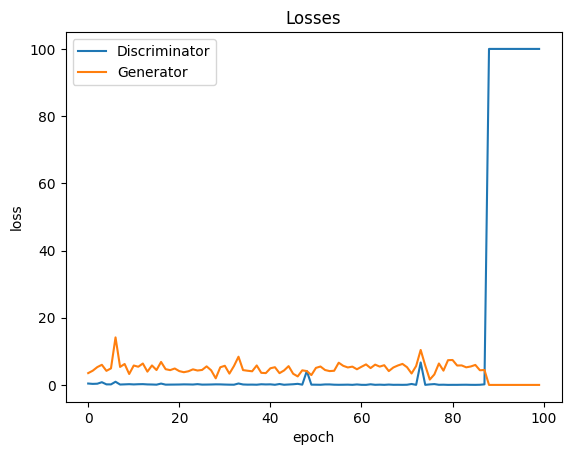

In [ ]:
# Plot the discriminator and generator losses over epochs
plt.plot(losses_d, '-')
plt.plot(losses_g, '-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Discriminator', 'Generator'])
plt.title('GAN Training Losses')


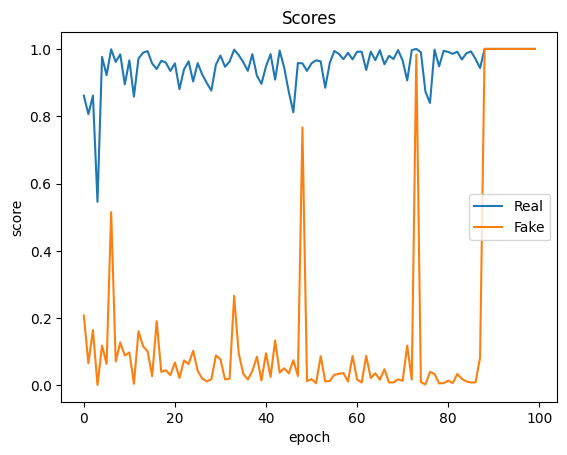

In [ ]:
# Plot the real and fake scores over epochs
plt.plot(real_scores, '-')
plt.plot(fake_scores, '-')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend(['Real', 'Fake'])
plt.title('Discriminator Scores (Real vs Fake)')